# SVC

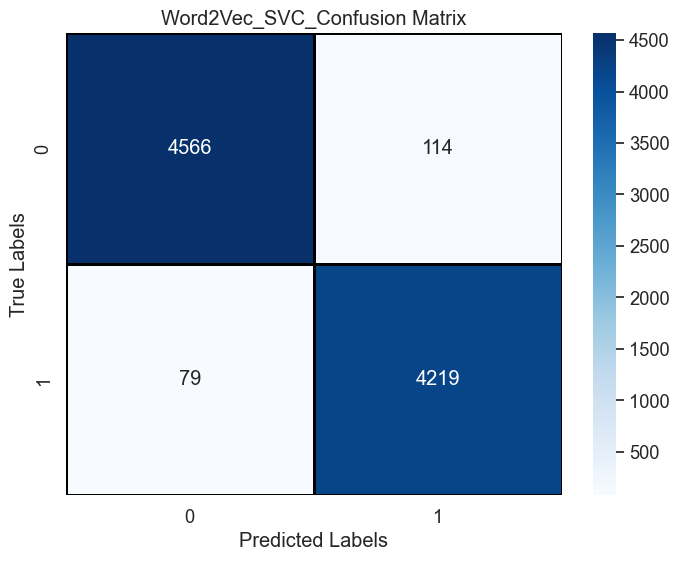

Accuracy: 0.9785030073513031


In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

X=np.load('Word2Vec_X.npy')
y=np.load('y.npy')
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 创建SVC模型
svc_model = SVC()

# 训练模型
svc_model.fit(X_train, y_train)

# 预测
y_pred = svc_model.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建热图
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=2, linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Word2Vec_SVC_Confusion Matrix")
plt.show()

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# LightGBM

[LightGBM] [Info] Number of positive: 11384, number of negative: 12556
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 23940, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475522 -> initscore=-0.097990
[LightGBM] [Info] Start training from score -0.097990
[LightGBM] [Info] Number of positive: 11384, number of negative: 12557
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 23941, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475502 -> initscore=-0.098069
[LightGBM] [Info] Start training from score -0.098069
[LightGB

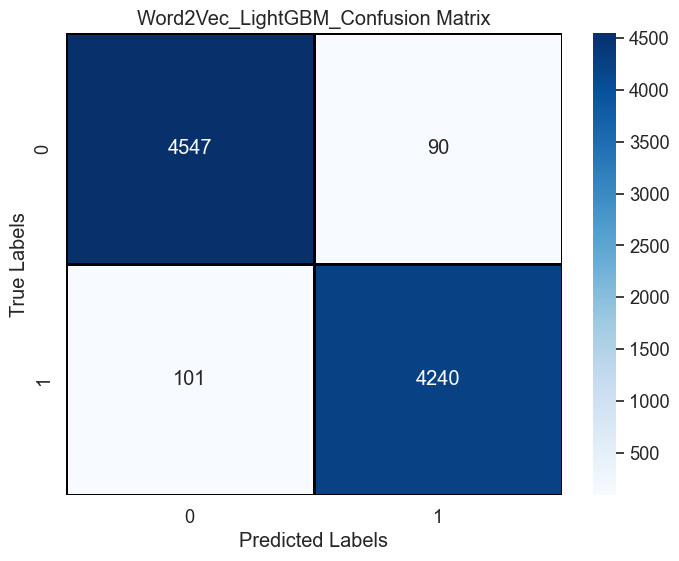

Accuracy: 0.9787257741145021


In [2]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# 将数据分为训练集和测试集
X=np.load('Word2Vec_X.npy')
y=np.load('y.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 创建LightGBM分类器
clf = lgb.LGBMClassifier()

# 设置要搜索的参数范围
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# 创建GridSearchCV对象
grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found by grid search are:", grid.best_params_)

# 使用最佳参数的模型进行预测
y_pred = grid.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建热图
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=2, linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Word2Vec_LightGBM_Confusion Matrix")
plt.show()

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")